**Marketing Campaign Performance Insights**

In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv"

df = pd.read_csv(url)

**Basic Structure:**

In [ ]:
from IPython.display import display

# Display the first 5 rows

print("Overview of the dataset:")
df.head(10).style


Overview of the dataset:


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.940000,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.670000,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.200000,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023
3,4,Innovate Industries,Email,Women 25-34,45 days,Instagram,4.496375,7420,60.920000,Seattle,Spanish,2388,58251,6,Foodies,01-01-2023
4,5,Data Tech Solutions,Influencer,Men 25-34,30 days,Google Ads,4.405930,2146,138.820000,Chicago,English,1025,34407,5,Tech Enthusiasts,01-01-2023
5,6,NexGen Systems,Social Media,Women 35-44,15 days,Google Ads,5.481449,9416,-20.350000,"Washington, D.C.",English,1500,52838,8,Outdoor Adventurers,01-01-2023
6,7,Alpha Innovations,Display,Women 35-44,30 days,Website,3.916375,1065,1122.070000,"Washington, D.C.",Spanish,2603,73970,5,Outdoor Adventurers,01-01-2023
7,8,NexGen Systems,Influencer,Women 25-34,30 days,Facebook,4.516375,5634,10.490000,Los Angeles,Mandarin,1245,30219,5,Foodies,01-01-2023
8,9,Innovate Industries,Email,Women 25-34,45 days,Email,5.860946,4110,-11.680000,"Washington, D.C.",English,726,33932,5,Tech Enthusiasts,01-01-2023
9,10,NexGen Systems,Email,Men 25-34,60 days,Google Ads,4.746375,7923,-38.030000,"Washington, D.C.",Mandarin,982,22593,4,Tech Enthusiasts,01-01-2023


In [219]:
# Get number of rows and columns
print("\nDataset Shape (rows, columns):")
print(df.shape)
print("-"*90)

# Get concise summary including data types and non-null counts
print("\nDataset Info:")
print(df.info())
print("-"*90)

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe().round(2))
print("-"*90)



Dataset Shape (rows, columns):
(22029, 16)
------------------------------------------------------------------------------------------

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Campaign_ID       22029 non-null  int64         
 1   Company           22029 non-null  object        
 2   Campaign_Type     22029 non-null  object        
 3   Target_Audience   22029 non-null  object        
 4   Duration          22029 non-null  object        
 5   Channel_Used      22029 non-null  object        
 6   Conversion_Rate   22029 non-null  float64       
 7   Acquisition_Cost  22029 non-null  int64         
 8   ROI               22029 non-null  float64       
 9   Location          22029 non-null  object        
 10  Language          22029 non-null  object        
 11  Clicks            22029 non-null  int64

**Data Exploration:**

In [ ]:
# Number of unique Campaign_ID values\
count_Campaign_ID = df["Campaign_ID"].nunique()
print("Number of unique Campaign_ID values in the dataset:", count_Campaign_ID)


# Unique values of the Location
unique_location = df['Location'].unique()
print("\nUnique values of the Location:")
print(unique_location)


# Unique values of the Customer_Segment
unique_customer_seg = df['Customer_Segment'].unique()
print("\nUnique values of the Customer_Segment:")
print(unique_customer_seg)


# Count occurrences in Campaign_Type
print("\nCampaign_Type counts:")
print(df["Campaign_Type"].value_counts())

# Count occurrences in Channel_Used
print("\nChannel_Used counts:")
print(df["Channel_Used"].value_counts())


Number of unique Campaign_ID values in the dataset: 22029

Unique values of the Location:
['Houston' 'Washington, D.C.' 'Miami' 'Seattle' 'Chicago' 'Los Angeles'
 'Atlanta' 'Dallas' 'New York' 'San Francisco']

Unique values of the Customer_Segment:
['Tech Enthusiasts' 'Foodies' 'Fashionistas' 'Outdoor Adventurers'
 'Health & Wellness']

Campaign_Type counts:
Campaign_Type
Display         4450
Search          4441
Social Media    4412
Email           4388
Influencer      4338
Name: count, dtype: int64

Channel_Used counts:
Channel_Used
Facebook      3742
Google Ads    3694
Website       3688
Instagram     3649
YouTube       3632
Email         3624
Name: count, dtype: int64


**Exploratory Data Analysis (EDA) and Visualization**

Campaign Performance:

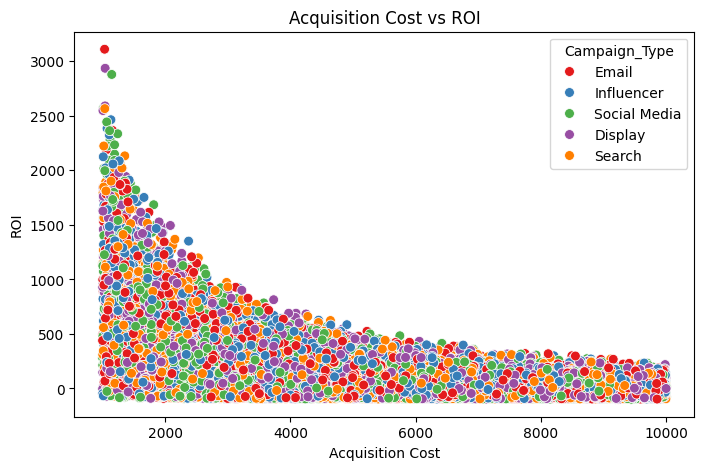

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Relationship between Acquisition_Cost and ROI.
# Scatter plot:

plt.figure(figsize=(8,5),)

sns.scatterplot(data=df,
                x="Acquisition_Cost",
                y="ROI",
                hue="Campaign_Type",
                s=50,
                palette="Set1")

plt.title("Acquisition Cost vs ROI")
plt.xlabel("Acquisition Cost")
plt.ylabel("ROI")
plt.show()

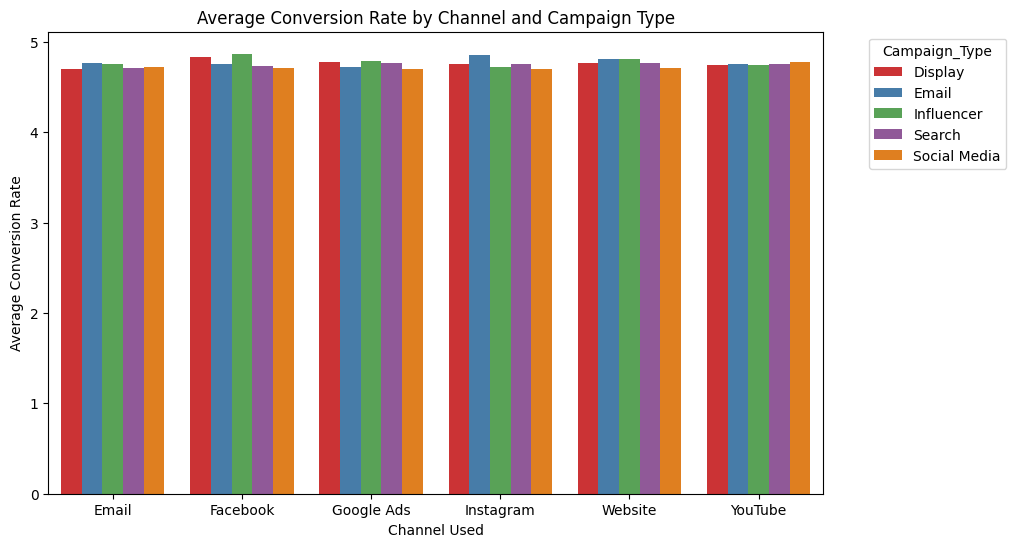

In [ ]:
# Average Conversion_Rate by Channel_Used and Campaign_Type
# Bar chart:

plt.figure(figsize=(10,6))

conversion_avg = df.groupby(["Channel_Used", "Campaign_Type"])["Conversion_Rate"].mean().reset_index()

sns.barplot(data=conversion_avg,
            x="Channel_Used",
            y="Conversion_Rate",
            hue="Campaign_Type",
            palette='Set1')

plt.title("Average Conversion Rate by Channel and Campaign Type")
plt.xlabel("Channel Used")
plt.ylabel("Average Conversion Rate")
plt.legend(title="Campaign_Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

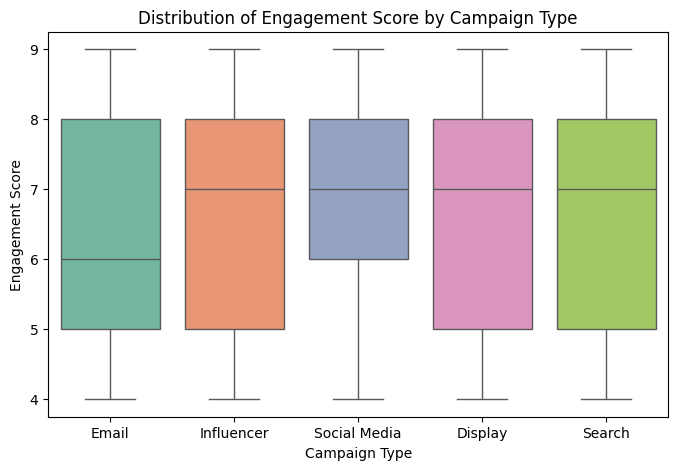

In [ ]:
# Visualize the distribution of Engagement_Score across different Campaign_Type
# Box plot:

plt.figure(figsize=(8, 5))

sns.boxplot(x="Campaign_Type",
            y="Engagement_Score",
            hue="Campaign_Type",
            data=df,
            palette="Set2")


plt.title("Distribution of Engagement Score by Campaign Type")
plt.xlabel("Campaign Type")
plt.ylabel("Engagement Score")
plt.show()

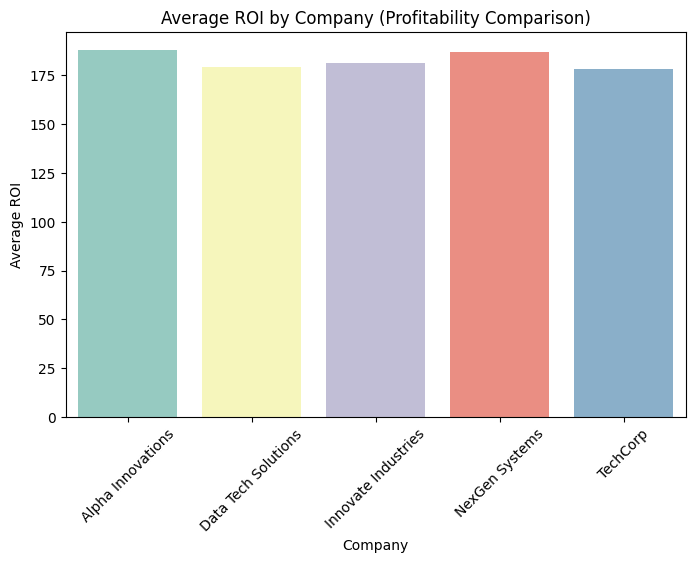

In [ ]:
# Average ROI by Company to compare the profitability of campaigns conducted by different companies.
# Bar chart:

avg_roi = df.groupby("Company")["ROI"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="Company",
            y="ROI",
            data=avg_roi,
            errorbar=None,
            hue='Company',
            palette='Set3',
            dodge=False)

plt.title("Average ROI by Company (Profitability Comparison)")
plt.xlabel("Company")
plt.ylabel("Average ROI")
plt.xticks(rotation=45)

plt.show()

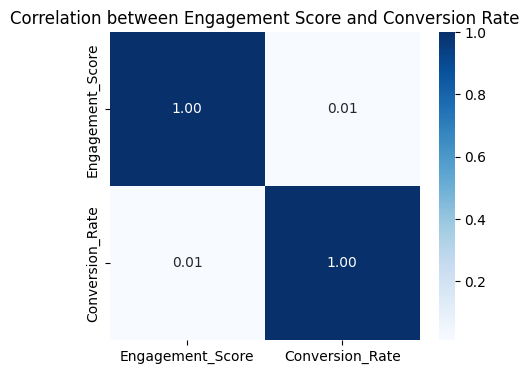

In [ ]:
# Correlation between Engagement_Score and Conversion_Rate
# Heatmap:

corr = df[["Engagement_Score", "Conversion_Rate"]].corr()

plt.figure(figsize=(5, 4))

sns.heatmap(corr,
            annot=True,
            cmap="Blues",
            fmt=".2f")

plt.title("Correlation between Engagement Score and Conversion Rate")
plt.show()

Customer Segmentation:

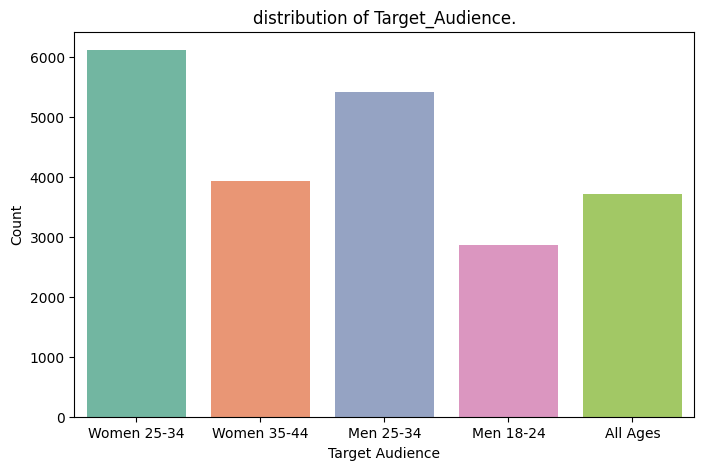

In [ ]:
# Distribution of Target_Audience.
# Count plot:

plt.figure(figsize=(8, 5))

sns.countplot(x="Target_Audience",
              hue="Target_Audience",
              data=df,
              palette="Set2")

plt.title("distribution of Target_Audience.")
plt.xlabel("Target Audience")
plt.ylabel("Count")

plt.show()

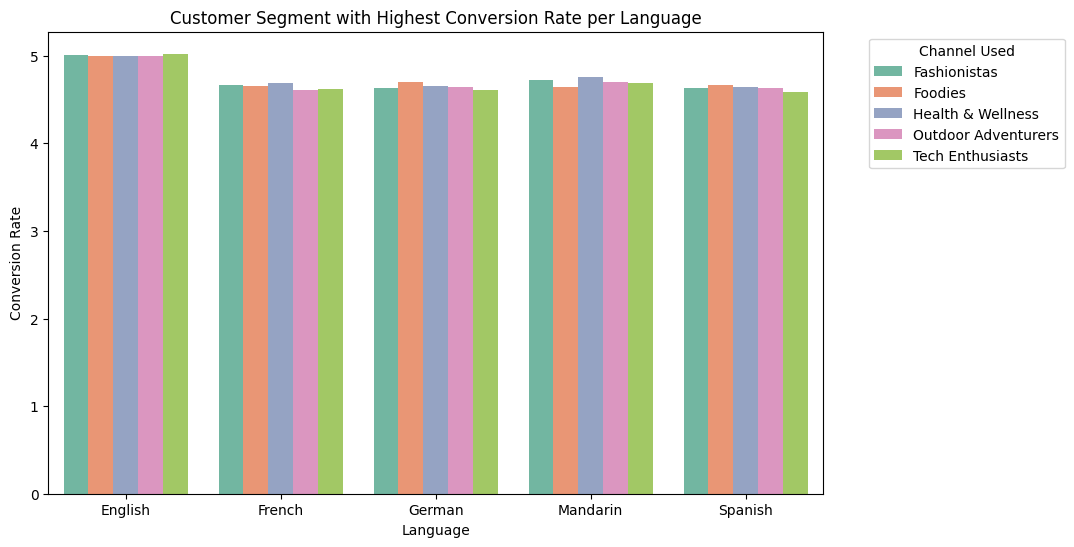

In [ ]:
# Identify highest Customer_Segment for each Language
# Bar chart:

avg_conversion = df.groupby(["Language", "Customer_Segment"])["Conversion_Rate"].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x="Language",
            y="Conversion_Rate",
            hue="Customer_Segment",
            data=avg_conversion,
            palette="Set2")

plt.title("Customer Segment with Highest Conversion Rate per Language")
plt.xlabel("Language")
plt.ylabel("Conversion Rate")
plt.legend(title="Channel Used", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

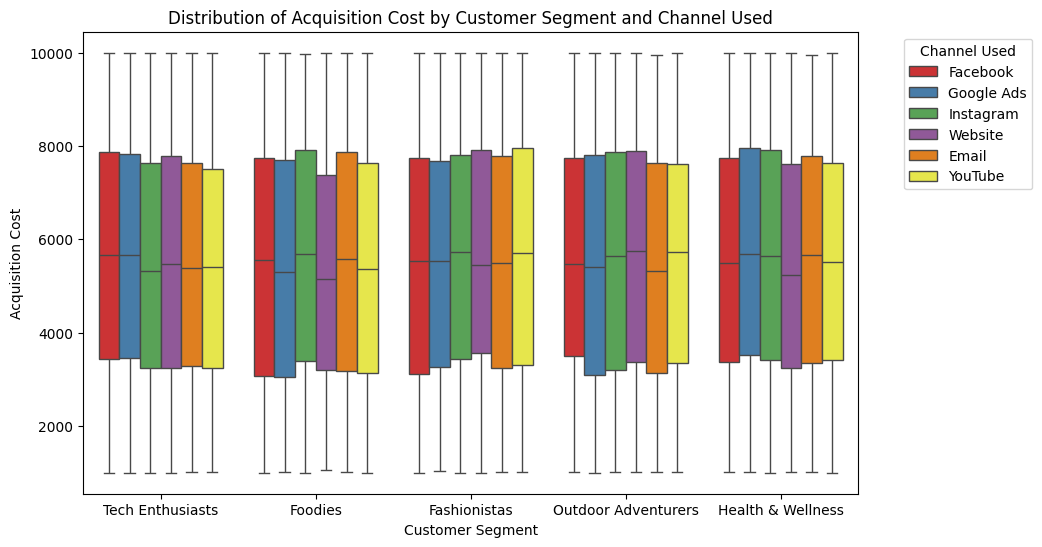

In [ ]:
# Distribution of Acquisition_Cost across each Customer_Segment, categorized by Channel_Used
# Box plot:

plt.figure(figsize=(10, 6))

sns.boxplot(x="Customer_Segment",
            y="Acquisition_Cost",
            hue="Channel_Used",
            data=df,
            palette="Set1")

plt.title("Distribution of Acquisition Cost by Customer Segment and Channel Used")
plt.xlabel("Customer Segment")
plt.ylabel("Acquisition Cost")
plt.legend(title="Channel Used", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
plt.show()

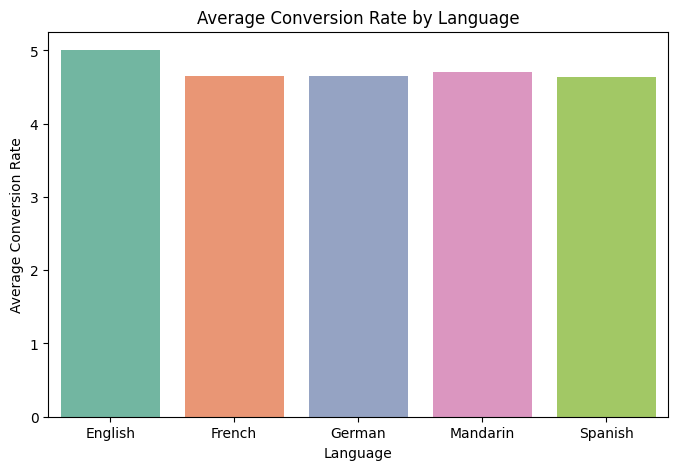

In [ ]:
# Average Conversion_Rate by Language to compare the effectiveness of campaigns conducted in different languages.
# Bar chart:

avg_conversion = df.groupby("Language")["Conversion_Rate"].mean().reset_index()

plt.figure(figsize=(8, 5))

sns.barplot(x="Language",
            y="Conversion_Rate",
            data=avg_conversion,
            hue= 'Language',
            palette="Set2",
            errorbar=None)

plt.title("Average Conversion Rate by Language")
plt.xlabel("Language")
plt.ylabel("Average Conversion Rate")
plt.show()

Channel Eff ectiveness:

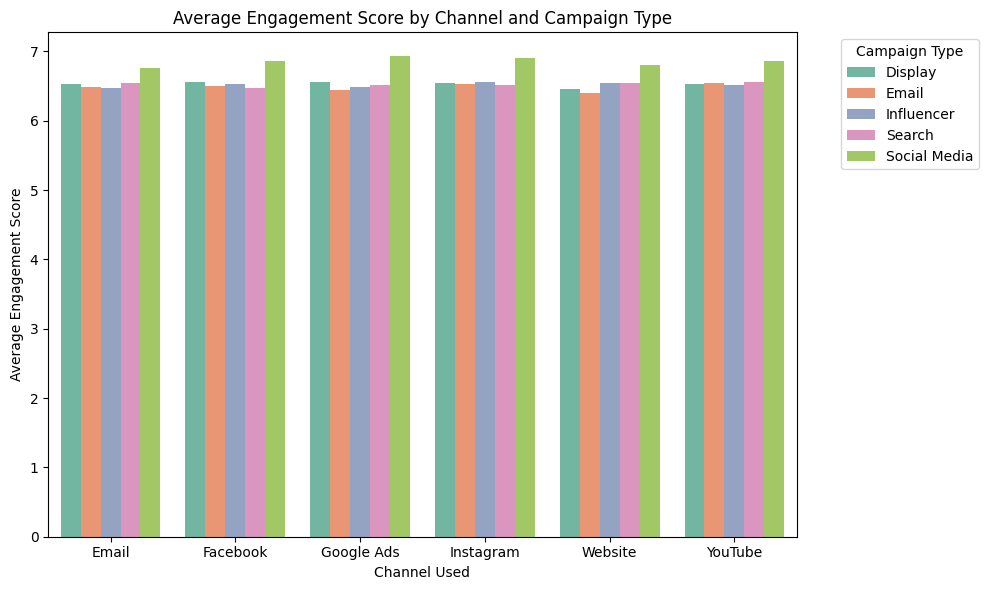

In [ ]:
# Compare the Engagement_Score for different Channels_Used, segmented by Campaign_Type
# Bar chart:

avg_engagement = df.groupby(["Channel_Used", "Campaign_Type"])["Engagement_Score"].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x="Channel_Used",
            y="Engagement_Score",
            hue="Campaign_Type",
            data=avg_engagement,
            palette="Set2")

plt.title("Average Engagement Score by Channel and Campaign Type")
plt.xlabel("Channel Used")
plt.ylabel("Average Engagement Score")
plt.legend(title="Campaign Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

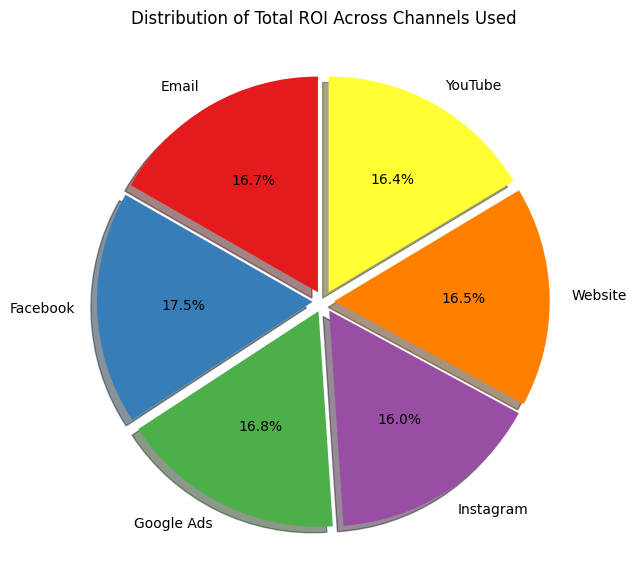

In [ ]:
# Distribution of total ROI across different Channels_Used
# Pie chart:

roi_distribution = df.groupby("Channel_Used")["ROI"].sum()

explode = [0.05] * len(roi_distribution)

colors = plt.cm.Set1(range(len(roi_distribution)))

plt.figure(figsize=(7, 7))

plt.pie(roi_distribution,
    labels=roi_distribution.index,
    autopct="%1.1f%%",
    startangle=90,
    explode=explode,
    colors=colors,
    shadow=True)

plt.title("Distribution of Total ROI Across Channels Used")
plt.show()

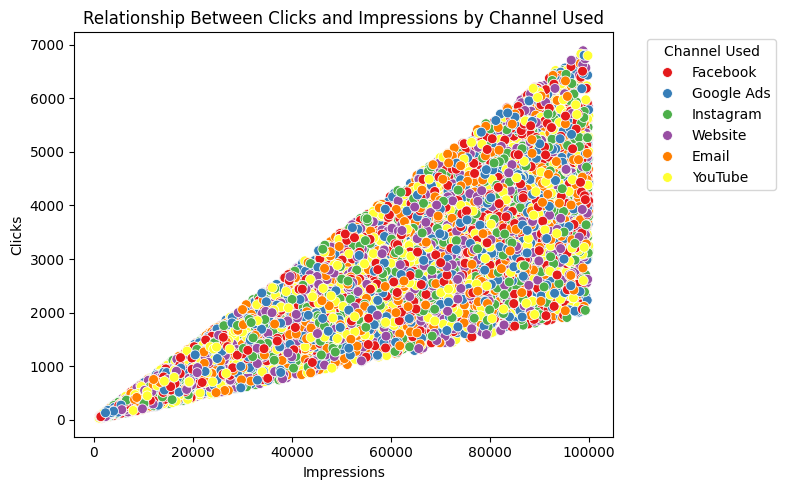

In [ ]:
# Relationship between Clicks and Impressions for each Channel_Used.
# Scatter plot:

plt.figure(figsize=(8, 5))

sns.scatterplot(x="Impressions",
                y="Clicks",
                hue="Channel_Used",
                data=df,
                s=50,
                palette='Set1')

plt.title("Relationship Between Clicks and Impressions by Channel Used")
plt.xlabel("Impressions")
plt.ylabel("Clicks")
plt.legend(title="Channel Used", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Time-Based Analysis:

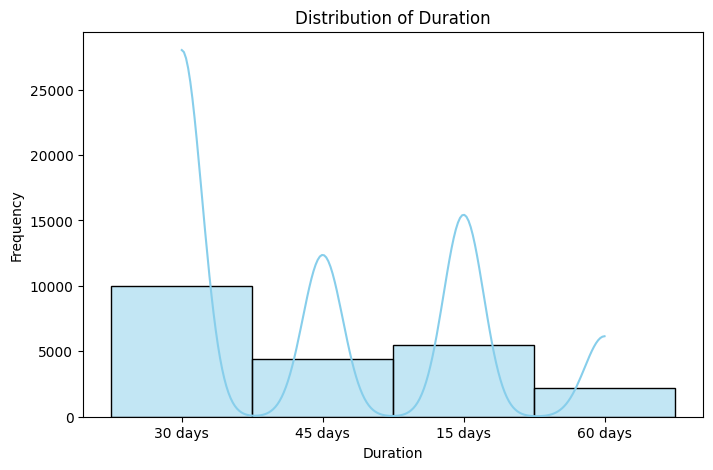

In [ ]:
# Distribution of Duration
# Histogram:

plt.figure(figsize=(8, 5))

sns.histplot(data=df,
             x='Duration',
             bins=20,
             kde=True,
             color='skyblue')

plt.title("Distribution of Duration")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

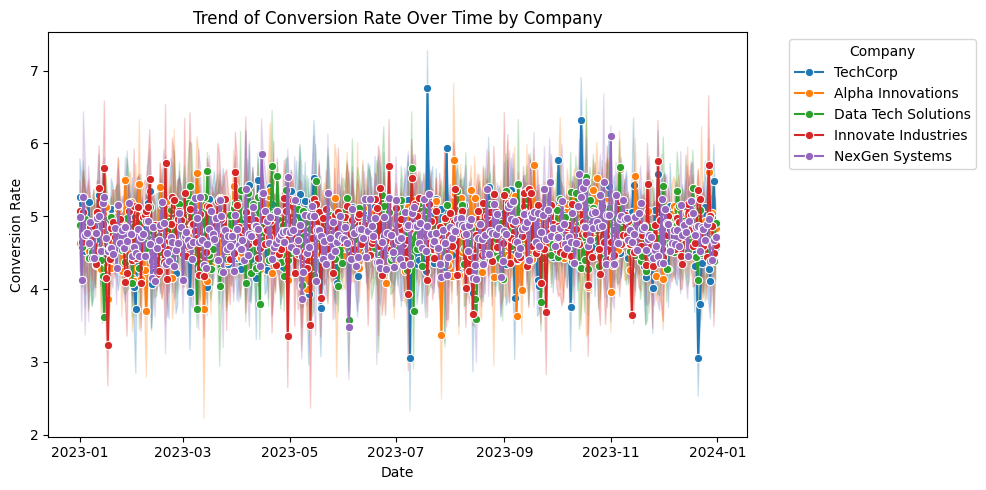

In [ ]:
# Overall Conversion_Rate changed over Date for each Company
# Line chart:

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')

plt.figure(figsize=(10, 5))

sns.lineplot(x="Date",
             y="Conversion_Rate",
             hue="Company",
             data=df,
             marker="o")

plt.title("Trend of Conversion Rate Over Time by Company")
plt.xlabel("Date")
plt.ylabel("Conversion Rate")
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

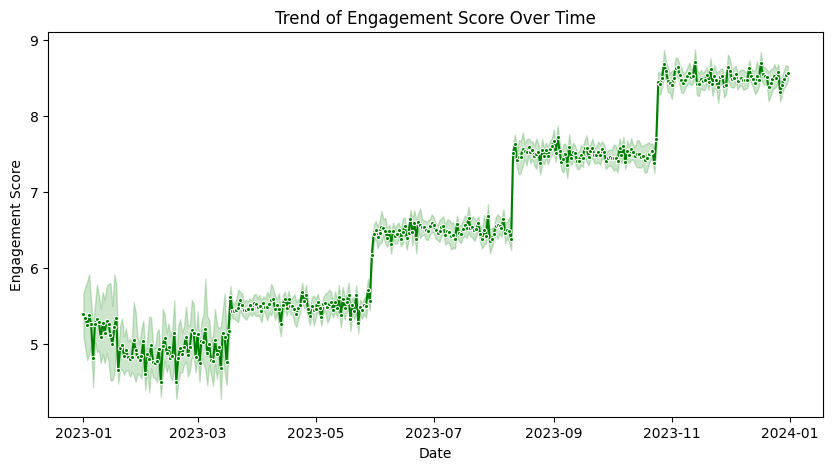

In [ ]:
# Trend of Engagement_Score over Date
# Line chart:

plt.figure(figsize=(10, 5))

sns.lineplot(x="Date",
             y="Engagement_Score",
             data=df,
             color='green',
             marker=".")

plt.title("Trend of Engagement Score Over Time")
plt.xlabel("Date")
plt.ylabel("Engagement Score")
plt.show()


Geographic Analysis:

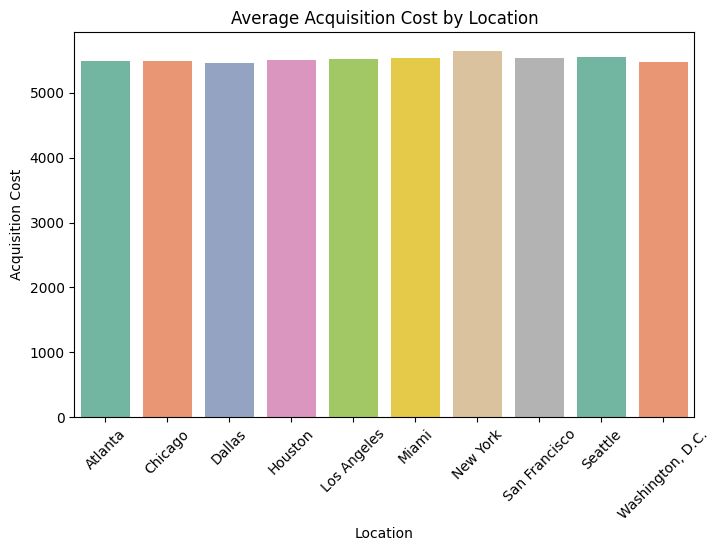

In [ ]:
# Find location which has the highest Acquisition_Cost
# Bar chart:

avg_cost = df.groupby("Location")["Acquisition_Cost"].mean().reset_index()

plt.figure(figsize=(8, 5))

sns.barplot(x="Location",
            y="Acquisition_Cost",
            hue="Location",
            data=avg_cost,
            palette="Set2")

plt.title("Average Acquisition Cost by Location")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.ylabel("Acquisition Cost")
plt.show()

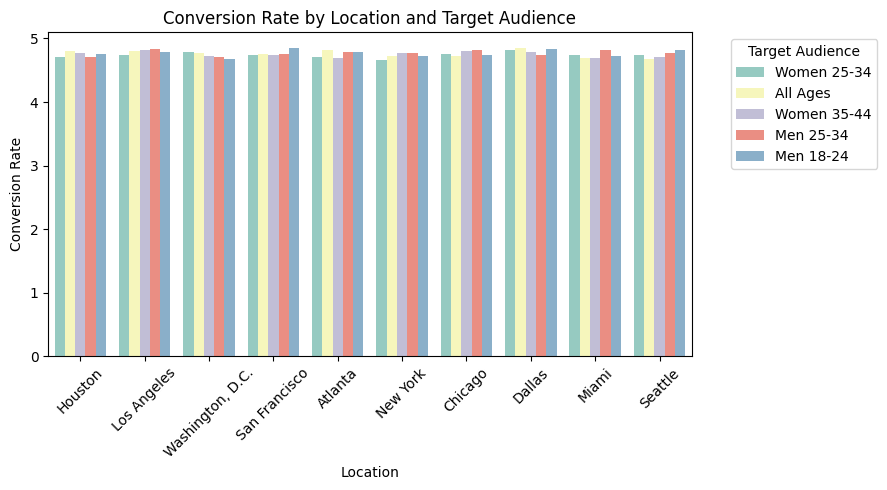

In [ ]:
# Conversion_Rate by different Location, categorized by Target_Audience
# Bar chart:

plt.figure(figsize=(9, 5))

sns.barplot(x="Location",
            y="Conversion_Rate",
            hue="Target_Audience",
            data=df,
            palette="Set3",
            errorbar=None)

plt.title("Conversion Rate by Location and Target Audience")
plt.xlabel("Location")
plt.ylabel("Conversion Rate")
plt.legend(title="Target Audience", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

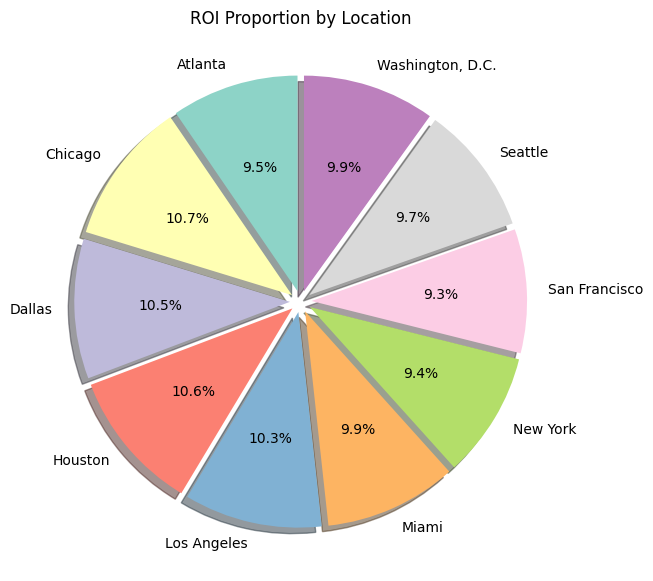

In [ ]:
# The proportion of ROI by Location
# Pie chart:

roi_location = df.groupby("Location")["ROI"].sum()

explode = [0.05] * len(roi_location)
colors = plt.cm.Set3(range(len(roi_location)))

plt.figure(figsize=(7, 7))

plt.pie(roi_location,
        labels=roi_location.index,
        autopct="%1.1f%%",
        startangle=90,
        explode=explode,
        colors=colors,
        shadow=True)

plt.title("ROI Proportion by Location")
plt.show()
